# Various functions for data analysis w ATLASPix
## Miscellaneous 

In [1]:
import h5py 
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
# Open files with data! Multiple different file types/data to open

plot_y = open("pixel_0_50_Y_peaks.txt", "r")
y = plot_y.read().splitlines() 
Y = np.array(y, dtype=float)
print(Y)

[0.15769  0.270006 0.272432 ... 0.279854 0.202622 0.308312]


In [3]:
# Opening more text files

file_a = "cd_pixel_12_50_9_23_2020.txt"
file_b = "fe_pixel_0_50_9_23_2020.txt"
file_c = "cd_pixel_0_50_9_23_2020.txt"

open_file_a = open(file_a, "r")
read_file_a = open_file_a.read().split(',')
read_file_a.remove(' ')

open_file_b = open(file_b, "r")
read_file_b = open_file_b.read().split(',')
read_file_b.remove(' ')

open_file_c = open(file_c, "r")
read_file_c = open_file_c.read().split(',')
read_file_c.remove(' ')

Cd_12_50_9_23 = np.array(read_file_a, dtype=float)
open_file_a.close()

Fe_0_50_9_23 = np.array(read_file_b, dtype=float)
open_file_b.close()

Cd_0_50_9_23 = np.array(read_file_c, dtype=float)
open_file_c.close()

In [4]:
# And opening more files... 

plot_mo = open("pixel_0_50_Mo_peaks.txt", "r")
mo = plot_mo.read().splitlines()
Mo = np.array(mo, dtype=float)
print(Mo)

plot_ba = open("pixel_0_50_Ba_peaks.txt", "r")
ba = plot_ba.read().splitlines()
Ba = np.array(ba, dtype=float)
print(Ba)

[0.190604 0.372404 0.336632 ... 0.346138 0.339614 0.242494]
[0.456112 0.216752 0.123032 ... 0.199968 0.49096  0.147336]


In [5]:
# Moving on from text files to open h5py files and sort through the data...
#
# The text files only contain the 'peak' values from traces recorded during data collection.
# While taking data, each trace displayed by the oscilloscope is recorded as a list of 10000 points; the 
# trace is then stored in an array. A complete array of data would then contain 5000 traces (or however
# many hits you set the code to take) with each trace made up of 10000 points of data. The "peak" of each 
# trace is the maximum value of each trace with a noise sample subtracted off. The noise sample is taken
# for about 1000 points of data from each trace where the hit does not occur. 
#
# In contrast to the text files, the h5py files contain complete trace data, so some sifting is necessary
# to find the peak value of each trace. This is performed by the find_peaks function. I usually plot a few
# traces from each data set to get a visual idea of the data and to make sure my noise sample is reasonable.
#
# A note about opening h5py files: It is absolutely safest and best practice to open them with the command
# "with h5py.File('filename', 'r') as file_#:" because this automatically closes the file when you're done.
# Otherwise, as soon as you're done with an h5py file, you have to close it (!!) because if it's left open
# it will be lost forever (well, most of the time) and cause only misery.

def find_peaks(run_name):
    peaks = np.zeros(len(run_name))
    difference = np.zeros(len(run_name))
    max_point = 0
    noise_sample = 0

    for i in range(len(run_name)):
        max_point = np.max(run_name[i])
        noise_sample = np.mean(run_name[i,1500:2500])
        peaks[i] = max_point - noise_sample
        
    return peaks

with h5py.File('pixel_0_50_fe_1.h5py', 'r') as file_1:
    print(list(file_1.keys()))
    plot_fe_0_50 = file_1['run2']
    Fe_0_50 = find_peaks(plot_fe_0_50)
with h5py.File('pixel_12_50_cd_1.h5py', 'r') as file_2:   
    print(list(file_2.keys()))
    plot_cd_12_50 = file_2['run3']
    Cd_12_50 = find_peaks(plot_cd_12_50)
with h5py.File('pixel_12_50_fe_10_2_20.h5py', 'r') as file_3:
    print(list(file_3.keys()))
    plot_fe_12_50_10_2 = file_3['run1']
    Fe_12_50_10_2 = find_peaks(plot_fe_12_50_10_2)
with h5py.File('pixel_0_50_cd_run1.h5py', 'r') as file_4:
    print(list(file_4.keys()))
    plot_cd_0_50 = file_4['run5']
    Cd_0_50 = find_peaks(plot_cd_0_50)
with h5py.File('pixel_0_50_ge_run2.h5py', 'r') as file_5:   
    print(list(file_5.keys()))
    plot_ge = file_5['run3']
    Ge = find_peaks(plot_ge)
with h5py.File('pixel_12_50_y_10_13_20.h5py', 'r') as file_6:   
    print(list(file_6.keys()))
    plot_y_10_13 = file_6['run2']
    Y_10_13 = find_peaks(plot_y_10_13)
with h5py.File('pixel_12_50_fe_1.h5py', 'r') as file_7:   
    print(list(file_7.keys()))
    plot_fe_12_50 = file_7['run2']
    Fe_12_50 = find_peaks(plot_fe_12_50)

['run2']
['cd_12_50_1_peaks', 'run3']
['run1']
['run1', 'run1_peaks', 'run5']
['run3', 'run3_peaks']
['run2']
['run1', 'run1_peaks', 'run2', 'run2_peaks']


In [6]:
# Just making sure the files are really closed haha

file_1.close()
file_2.close()
file_3.close()
file_4.close()
file_5.close()
file_6.close()
file_7.close()

In [7]:
# Include new Fe data from a different pixel
plot_fe = open('pixel_12_50_fe_peaks.txt', 'r')
fe = plot_fe.read().splitlines() 
Fe = np.array(fe, dtype=float)
print(Fe)

[0.116514 0.04877  0.11546  ... 0.111842 0.10902  0.104324]


In [9]:
# Here is some arachaic code I haven't used in a while, so not even sure if it still works...
# But I wrote this to parse MCA data. I haven't used the MCA in a while, I moved to the scope.
# If for some reason MCA data needs to be parsed, here is some stuff:

# Plotting MCA data

plot_cd_MCA = open('live_data_cd_109_0_50.mca', 'rb')
cd_mca = plot_cd_MCA.read().decode(errors='replace').splitlines()
counter = 0
MCA_peaks_cd = []

for line in cd_mca:
    if '<<DATA>>' in cd_mca[counter]:
        for i in range(len(cd_mca) - counter):
            if '<<END>>' in cd_mca[counter+i+1]:
                break
            else:
                entry = cd_mca[counter+i+1].split()
                MCA_peaks_cd.append((float(entry[0]))) 
    counter += 1
    
#######

plot_fe_MCA = open('live_data_fe55_0_50_2.mca', 'rb')
fe_mca = plot_fe_MCA.read().decode(errors='replace').splitlines()
counter = 0
MCA_peaks_fe = []

for line in fe_mca:
    if '<<DATA>>' in fe_mca[counter]:
        for i in range(len(fe_mca) - counter):
            if '<<END>>' in fe_mca[counter+i+1]:
                break
            else:
                entry = fe_mca[counter+i+1].split()
                MCA_peaks_fe.append((float(entry[0]))) 
    counter += 1
########

In [10]:
# More plotting w MCA!! This is for plotting multiple uncalibrated MCA peaks

import scipy
from scipy.optimize import curve_fit
import pylab 
from matplotlib.pyplot import cm

def plot_multiple_resolutions_MCA(peaks_names, guesses, labels):
   
    plt.figure(figsize = (10, 8))
    color=(cm.rainbow(np.linspace(0,1,len(peaks_names)*2)))
    for i in range(len(peaks_names)):
        
        x_pos = np.arange(0,len(peaks_names[i]),1) + 0.5
        xspace = np.linspace(0,len(peaks_names[i]), 10000) # This creates a smoother plot when plotting the fit

        # Guesses for p01: [Amplitude, Mu, Sigma]. These guesses must be reasonable.
        p01 = guesses[i]

        # Define the fit function (a Gaussian)
        def Gauss(x, A, mu, sigma):
            return A*np.exp(-(x-mu)**2/(2.0*sigma**2))

        popt, pcov = curve_fit(Gauss, xdata=x_pos, ydata=peaks_names[i], p0=p01)
        
        # Print the outputs 
        (Amp, Mu, Sigma) = popt
        print("For %s, amplitude = %d, Mu = %0.4f, Sigma = %0.4f" %(labels[i], Amp, Mu, Sigma))
        energy_res = (2.355*(np.abs(Sigma))*100)/Mu # Calculates energy resolution
        (Amp_err, Mu_err, Sigma_err) = np.sqrt(np.diag(pcov))
        # Error propagation
        partial_sigma = (2.355*100)/Mu
        partial_mu = (2.355*100*Sigma)/(Mu**2)
        stdev_er = np.sqrt(((partial_sigma**2)*(Sigma_err**2))+((partial_mu**2)*(Mu_err)**2))
        print("Error in amplitude is %0.3f. \nError in mu is %0.6f. \nError in sigma is %0.6f." %(Amp_err, Mu_err, Sigma_err))
        print("The energy resolution for %s is approximately %0.3f +/- %0.5f %%." %(labels[i], energy_res, stdev_er))
        c=color[2*i]
        plt.bar(x_pos, peaks_names[i], width=1.0, color=c, alpha=0.6, label=r'Data'+' '+(labels[i])+'\nE Res %.2f%%'%(energy_res))
        # Plot the fit
        n=color[2*i + 1]
        plt.plot(xspace, Gauss(xspace, *popt), '-', color=n)
        # Change the title of the plot and the saved figure!
        # plt.savefig('Energy Resolution Post Vibe')
    plt.legend()
    plt.title('Energy Resolution')
    plt.xlabel('Energy (V)')
    plt.ylabel('Counts')
    plt.show()
    
    return

For Fe, amplitude = 33, Mu = 5753.3993, Sigma = 55.9730
Error in amplitude is 0.130. 
Error in mu is 0.246590. 
Error in sigma is 0.246590.
The energy resolution for Fe is approximately 2.291 +/- 0.01009 %.
For Cd, amplitude = 37, Mu = 8000.1048, Sigma = 51.0591
Error in amplitude is 0.374. 
Error in mu is 0.581652. 
Error in sigma is 0.581658.
The energy resolution for Cd is approximately 1.503 +/- 0.01712 %.


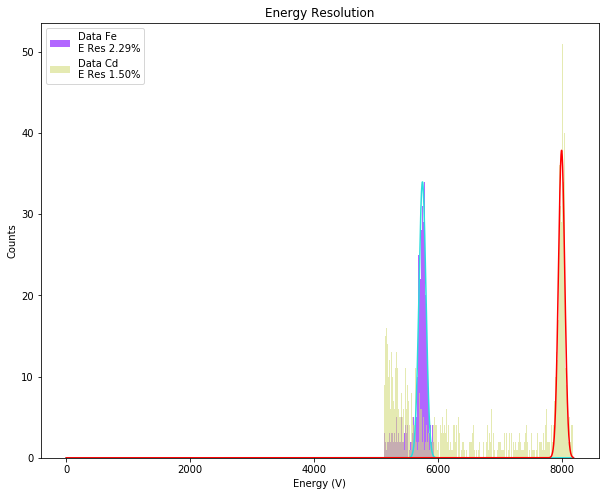

In [11]:
plot_multiple_resolutions_MCA([MCA_peaks_fe, MCA_peaks_cd], [[35, 5700, 0.5], [50, 8000, 0.5]],['Fe','Cd'])

The slope is 0.00716 +/- inf.
The intercept is -35.3095 +/- inf.


/Users/isbrewer/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:795: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


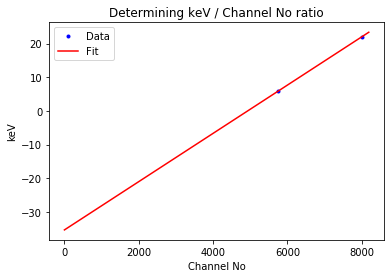

In [12]:
# Doing some energy calibration with the MCA data (with two data points! Oof).
# Shockingly the fit is linear.
# Converting from channel to keV, determining linearity

keV_MCA = [5.89875, 21.9906]
channel_no = [5753.3993, 8000.1048]
x_fit_MCA = np.linspace(0, 8192, 1000)
#x_err = [0.000180,0.000238,0.000275,0.000441,0.000307]
p0_lin_MCA = [0.00716, -35.3095]

def lin_MCA(x,m,b):
    return m*x + b
    
popt_lin_MCA, pcov_lin_MCA = curve_fit(lin_MCA, xdata=channel_no, ydata=keV_MCA, p0=p0_lin_MCA)
(m_MCA,b_MCA) = popt_lin_MCA
(m_err_MCA, b_err_MCA) = np.sqrt(np.diag(pcov_lin_MCA))
print("The slope is %0.5f +/- %0.5f." %(m_MCA, m_err_MCA))
print("The intercept is %0.4f +/- %0.4f." %(b_MCA, b_err_MCA))
plt.plot(channel_no, keV_MCA, '.', color='b', label='Data')
#plt.errorbar(V, keV, xerr=x_err, fmt='none')
plt.plot(x_fit_MCA, lin_MCA(x_fit_MCA,*popt_lin_MCA), 'r-', label='Fit')
plt.ylabel('keV')
plt.xlabel('Channel No')
plt.title('Determining keV / Channel No ratio')
plt.legend()
plt.show()

In [13]:
# This is for plotting multiple peaks of calibrated MCA data

def plot_kev_MCA(peaks_names, guesses, labels):
   
    plt.figure(figsize = (10, 8))
    color=(cm.rainbow(np.linspace(0,1,len(peaks_names)*3)))
    for i in range(len(peaks_names)):
        x_pos = (np.arange(0,len(peaks_names[i]),1) + 0.5)*m_MCA + b_MCA
        xspace = np.linspace(1,len(peaks_names[i]), 10000)*m_MCA + b_MCA

        # Guesses for p01: [Amplitude, Mu, Sigma]. These guesses must be reasonable.
        p01 = guesses[i]

        # Define the fit function (a Gaussian)
        def Gauss(x, A, mu, sigma):
            return A*np.exp(-(x-mu)**2/(2.0*sigma**2))

        popt, pcov = curve_fit(Gauss, xdata=x_pos, ydata=peaks_names[i], p0=p01)
        
        # Print the outputs 
        (Amp, Mu, Sigma) = popt
        print("For %s, amplitude = %d, Mu = %0.4f, Sigma = %0.4f" %(labels[i], Amp, Mu, Sigma))
        energy_res = (2.355*Sigma*100)/Mu # Calculates energy resolution
        (Amp_err, Mu_err, Sigma_err) = np.sqrt(np.diag(pcov))
        # Error propagation
        partial_sigma = (2.355*100)/Mu
        partial_mu = (2.355*100*Sigma)/(Mu**2)
        stdev_er = np.sqrt(((partial_sigma**2)*(Sigma_err**2))+((partial_mu**2)*(Mu_err)**2))
        print("Error in amplitude is %0.3f. \nError in mu is %0.6f. \nError in sigma is %0.6f." %(Amp_err, Mu_err, Sigma_err))
        print("The energy resolution for %s is approximately %0.3f +/- %0.5f %%." %(labels[i], energy_res, stdev_er))
        c=color[2*i]
        plt.bar(x_pos[5000:len(x_pos)], peaks_names[i][5000:len(x_pos)], width=1.0*m_MCA, color=c, alpha=0.6, label=r'Data'+' '+(labels[i])+'\nE Res %.2f%%'%(energy_res))
        # Plot the fit
        n=color[2*i + 1]
        plt.plot(xspace[6000:len(xspace)], Gauss(xspace, *popt)[6000:len(xspace)], '-', color=n)
    plt.legend()
    plt.title('Energy Resolution')
    plt.xlabel('keV')
    plt.ylabel('Counts')
    plt.show()
    
    return

For Fe, amplitude = 33, Mu = 5.8987, Sigma = 0.4009
Error in amplitude is 0.130. 
Error in mu is 0.001766. 
Error in sigma is 0.001766.
The energy resolution for Fe is approximately 16.005 +/- 0.07067 %.
For Cd, amplitude = 37, Mu = 21.9906, Sigma = 0.3657
Error in amplitude is 0.374. 
Error in mu is 0.004166. 
Error in sigma is 0.004166.
The energy resolution for Cd is approximately 3.916 +/- 0.04462 %.


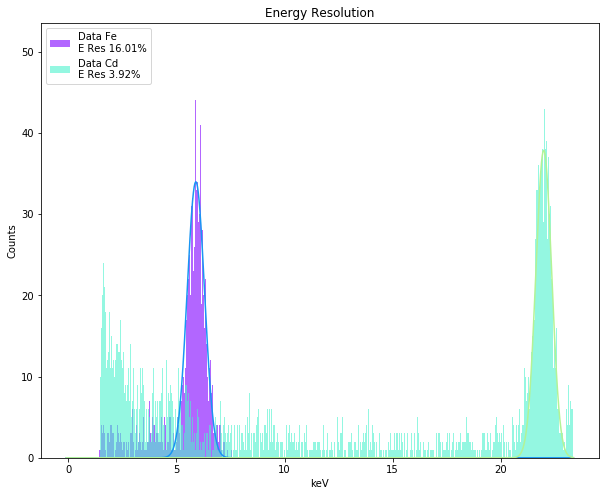

In [14]:
plot_kev_MCA([MCA_peaks_fe, MCA_peaks_cd], [[35, 5.89, 0.05], [50, 21.99, 0.05]],['Fe','Cd'])

In [13]:
# This function is to plot multiple photopeaks on the same plot using scope data.
# This used uncalibrated data where all the data came from a single pixel.
# The resulting plot is useful because it spits out photopeak position and sigma at each
# source energy; these values can be used to perform energy calibration.

import scipy
from scipy.optimize import curve_fit
import pylab
from matplotlib.pyplot import cm

def plot_multiple_photopeaks(peaks_names, guesses, labels):
    
    # Create a figure
    plt.figure(figsize = (10, 8))
    # Make it pretty! Important
    color=(cm.rainbow(np.linspace(0,1,len(peaks_names)*5)))
    color_fit=(cm.nipy_spectral(np.linspace(0,1,len(peaks_names)*5)))
    
    # Sift through the input peaks data ('peaks_names') and create some reasonable binning
    for i in range(len(peaks_names)):
        
        bins = np.linspace(0.03,0.52,150) # Initial binning parameters are hard coded, which is perhaps sloppy but it worked so
        fit_hist, bins_1 = np.histogram(peaks_names[i], bins=bins)
        bins_2 = np.array([bins[i] for i in range(len(bins)-1)])
        
        xspace = np.linspace(0.05, 0.52, 10000) # This creates a smoother plot when plotting the fit

        # Guesses for p01: [Amplitude, Mu, Sigma]. 
        # These are guesses for the fit function and change at each source energy. These guesses must be reasonable,
        # or the fit function will fail
        
        p01 = guesses[i]

        # Define the fit function (a Gaussian)
        def Gauss(x, A, mu, sigma):
            return A*np.exp(-(x-mu)**2/(2.0*sigma**2))

        popt, pcov = curve_fit(Gauss, xdata=bins_2, ydata=fit_hist, p0=p01)
        
        # Print the outputs 
        (Amp, Mu, Sigma) = popt
        print("For %s, amplitude = %d, Mu = %0.4f, Sigma = %0.4f" %(labels[i], Amp, Mu, Sigma))
        energy_res = (2.355*(np.abs(Sigma))*100)/Mu # Calculates energy resolution using FWHM
        (Amp_err, Mu_err, Sigma_err) = np.sqrt(np.diag(pcov))
        # Error propagation. For some reason I wrote this out like a nerd? There's def a function for this...
        partial_sigma = (2.355*100)/Mu
        partial_mu = (2.355*100*Sigma)/(Mu**2)
        stdev_er = np.sqrt(((partial_sigma**2)*(Sigma_err**2))+((partial_mu**2)*(Mu_err)**2))
        print("Error in amplitude is %0.3f. \nError in mu is %0.6f. \nError in sigma is %0.6f." %(Amp_err, Mu_err, Sigma_err))
        print("The energy resolution for %s is approximately %0.3f +/- %0.5f %%." %(labels[i], energy_res, stdev_er))
        # Making things pretty again. Important
        c=color[3*i + 1]
        j = color_fit[3*i + 2]
        # Now plotting!
        if labels[i]=='Cd': # Can't remember why Cd was being troublesome
            # Plot data
            plt.bar(bins_2[15:len(bins_2)], fit_hist[15:len(bins_2)], width=bins[1] - bins[0], color=c, alpha=0.6, label=(labels[i]))
            # Plot the fit
            plt.plot(xspace, Gauss(xspace, *popt), '-', linewidth=2.2, color=j)
        else:
            # Plot data
            plt.bar(bins_2, fit_hist, width=bins[1] - bins[0], color=c, alpha=0.6, label=(labels[i]))
            # Plot the fit
            plt.plot(xspace, Gauss(xspace, *popt), '-', linewidth=2.2, color=j)
    axes = plt. gca()
    axes.tick_params(axis='both', which='major', labelsize=25)
    #axes.tick_params(axis='both', which='minor', labelsize=8)
    plt.legend(fontsize=25)
    #plt.title('Energy Resolution, (0,50)', fontsize='x-large')
    plt.xlabel('Voltage', fontsize=30)
    plt.ylabel('Counts', fontsize=30)
    #plt.savefig('energy_res_no_energy_scaling_0_50.png')
    plt.show()
    
    return

For Fe, amplitude = 936, Mu = 0.0815, Sigma = 0.0057
Error in amplitude is 13.767. 
Error in mu is 0.000097. 
Error in sigma is 0.000097.
The energy resolution for Fe is approximately 16.559 +/- 0.28188 %.
For Ge, amplitude = 574, Mu = 0.1969, Sigma = 0.0078
Error in amplitude is 13.334. 
Error in mu is 0.000210. 
Error in sigma is 0.000210.
The energy resolution for Ge is approximately 9.385 +/- 0.25184 %.
For Y, amplitude = 465, Mu = 0.2972, Sigma = 0.0068
Error in amplitude is 18.149. 
Error in mu is 0.000307. 
Error in sigma is 0.000307.
The energy resolution for Y is approximately 5.405 +/- 0.24325 %.
For Mo, amplitude = 410, Mu = 0.3351, Sigma = 0.0072
Error in amplitude is 17.214. 
Error in mu is 0.000348. 
Error in sigma is 0.000348.
The energy resolution for Mo is approximately 5.045 +/- 0.24442 %.
For Cd, amplitude = 307, Mu = 0.3890, Sigma = 0.0067
Error in amplitude is 22.461. 
Error in mu is 0.000569. 
Error in sigma is 0.000569.
The energy resolution for Cd is approximate

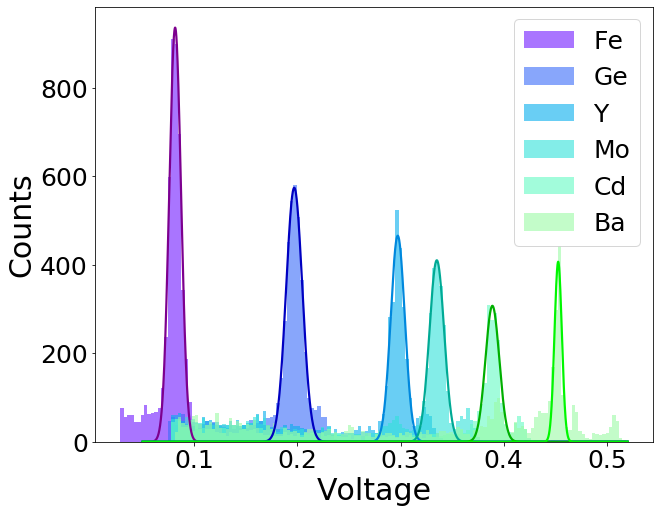

In [14]:
plot_multiple_photopeaks([Fe_0_50, Ge, Y, Mo, Cd_0_50, Ba], [[175, 0.1, 0.005], [175, 0.15, 0.005], [175, 0.26, 0.005], [175, 0.32, 0.005], [175, 0.37, 0.005], [450, 0.45, 0.01]],['Fe','Ge','Y','Mo','Cd','Ba'])

In [32]:
# The following plots are comparing uncalibrated data from other pixels, between pixels, at different
# times, etc.

For Fe, amplitude = 934, Mu = 0.0835, Sigma = 0.0056
Error in amplitude is 16.479. 
Error in mu is 0.000113. 
Error in sigma is 0.000113.
The energy resolution for Fe is approximately 15.696 +/- 0.32022 %.
For Y, amplitude = 382, Mu = 0.2276, Sigma = 0.0065
Error in amplitude is 22.789. 
Error in mu is 0.000446. 
Error in sigma is 0.000446.
The energy resolution for Y is approximately 6.716 +/- 0.46219 %.
For Cd, amplitude = 457, Mu = 0.2907, Sigma = 0.0052
Error in amplitude is 24.284. 
Error in mu is 0.000321. 
Error in sigma is 0.000321.
The energy resolution for Cd is approximately 4.233 +/- 0.25972 %.


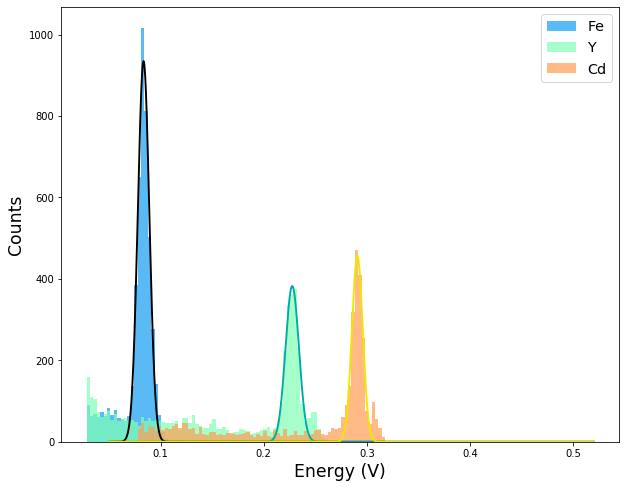

In [35]:
plot_multiple_photopeaks([Fe_12_50_10_2, Y_10_13, Cd_12_50_9_23], [[175, 0.1, 0.005], [175, 0.25, 0.005], [300, 0.29, 0.005]], ['Fe', 'Y', 'Cd'] )

For Cd (0,50) Pre-Covid, amplitude = 307, Mu = 0.3890, Sigma = 0.0067
Error in amplitude is 22.462. 
Error in mu is 0.000569. 
Error in sigma is 0.000569.
The energy resolution for Cd (0,50) Pre-Covid is approximately 4.086 +/- 0.34474 %.
For Cd (12,50) 8/2020, amplitude = 456, Mu = 0.2930, Sigma = 0.0048
Error in amplitude is 27.556. 
Error in mu is 0.000334. 
Error in sigma is 0.000334.
The energy resolution for Cd (12,50) 8/2020 is approximately 3.852 +/- 0.26827 %.
For Cd (12,50) 9/2020, amplitude = 0, Mu = 0.4000, Sigma = 0.0050
Error in amplitude is 53.476. 
Error in mu is 583520.570893. 
Error in sigma is 583520.637736.
The energy resolution for Cd (12,50) 9/2020 is approximately 2.944 +/- 343574614.08663 %.
For Cd (0,50) 9/2020, amplitude = 0, Mu = 0.4000, Sigma = 0.0050
Error in amplitude is 54.106. 
Error in mu is 590393.630309. 
Error in sigma is 590393.696356.
The energy resolution for Cd (0,50) 9/2020 is approximately 2.944 +/- 347621443.47095 %.


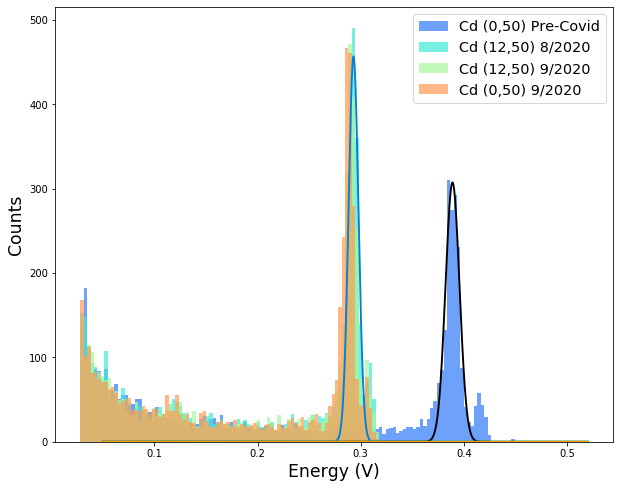

In [38]:
plot_multiple_photopeaks([Cd_0_50, Cd_12_50, Cd_12_50_9_23, Cd_0_50_9_23], [[175, 0.4, 0.005], [175, 0.3, 0.005], [175, 0.4, 0.005], [175, 0.4, 0.005]], ['Cd (0,50) Pre-Covid', 'Cd (12,50) 8/2020', 'Cd (12,50) 9/2020', 'Cd (0,50) 9/2020'])

For Fe (12,50) Pre-Covid, amplitude = 747, Mu = 0.1119, Sigma = 0.0071
Error in amplitude is 11.956. 
Error in mu is 0.000132. 
Error in sigma is 0.000132.
The energy resolution for Fe (12,50) Pre-Covid is approximately 15.032 +/- 0.27802 %.
For Fe (12,50) 10/2020, amplitude = 934, Mu = 0.0835, Sigma = 0.0056
Error in amplitude is 16.479. 
Error in mu is 0.000113. 
Error in sigma is 0.000113.
The energy resolution for Fe (12,50) 10/2020 is approximately 15.696 +/- 0.32022 %.
For Fe (0,50) 8/2020, amplitude = 936, Mu = 0.0815, Sigma = -0.0057
Error in amplitude is 13.767. 
Error in mu is 0.000097. 
Error in sigma is 0.000097.
The energy resolution for Fe (0,50) 8/2020 is approximately 16.559 +/- 0.28188 %.
For Fe (0,50) 9/2020, amplitude = 962, Mu = 0.0806, Sigma = -0.0055
Error in amplitude is 14.000. 
Error in mu is 0.000093. 
Error in sigma is 0.000093.
The energy resolution for Fe (0,50) 9/2020 is approximately 16.108 +/- 0.27122 %.


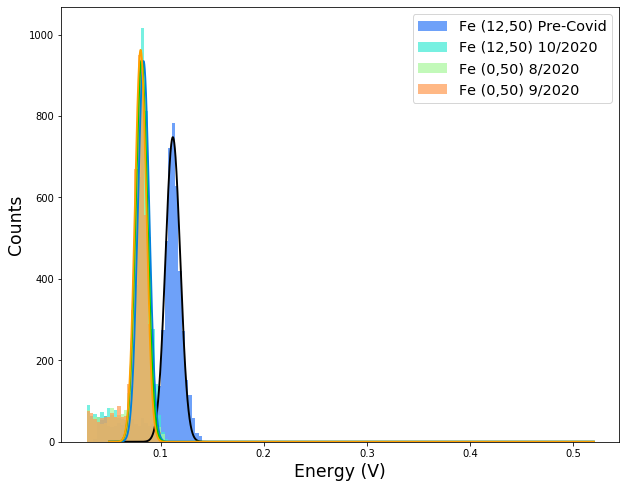

In [39]:
plot_multiple_photopeaks([Fe_12_50, Fe_12_50_10_2, Fe_0_50, Fe_0_50_9_23], [[800, 0.1, 0.005], [800, 0.1, 0.005], [800, 0.1, 0.005], [800, 0.1, 0.005]], ['Fe (12,50) Pre-Covid', 'Fe (12,50) 10/2020', 'Fe (0,50) 8/2020', 'Fe (0,50) 9/2020'])

For Fe Pixel (0,50), amplitude = 962, Mu = 0.0806, Sigma = -0.0055
Error in amplitude is 14.000. 
Error in mu is 0.000093. 
Error in sigma is 0.000093.
The energy resolution for Fe Pixel (0,50) is approximately 16.108 +/- 0.27122 %.
For Cd Pixel (0,50), amplitude = 474, Mu = 0.2880, Sigma = -0.0049
Error in amplitude is 25.455. 
Error in mu is 0.000307. 
Error in sigma is 0.000307.
The energy resolution for Cd Pixel (0,50) is approximately 4.047 +/- 0.25092 %.


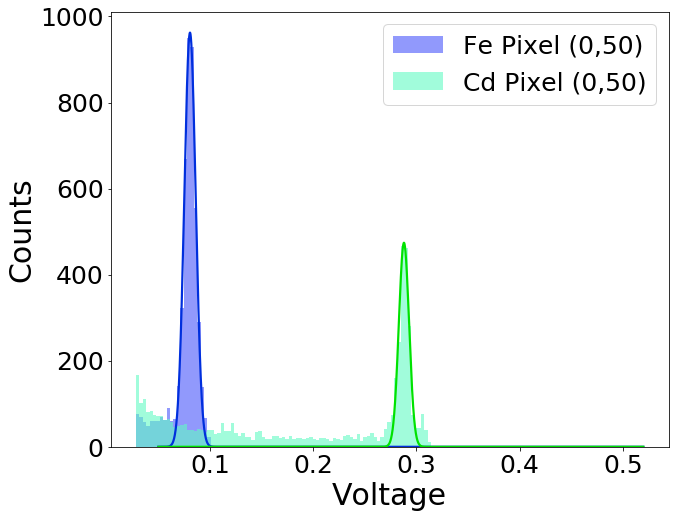

In [15]:
plot_multiple_photopeaks([Fe_0_50_9_23, Cd_0_50_9_23], [[800, 0.1, 0.005], [800, 0.3, 0.005]], ['Fe Pixel (0,50)', 'Cd Pixel (0,50)'])

For Fe Pixel (12,50), amplitude = 934, Mu = 0.0835, Sigma = 0.0056
Error in amplitude is 16.479. 
Error in mu is 0.000113. 
Error in sigma is 0.000113.
The energy resolution for Fe Pixel (12,50) is approximately 15.696 +/- 0.32022 %.
For Cd Pixel (12,50), amplitude = 457, Mu = 0.2907, Sigma = 0.0052
Error in amplitude is 24.285. 
Error in mu is 0.000321. 
Error in sigma is 0.000321.
The energy resolution for Cd Pixel (12,50) is approximately 4.233 +/- 0.25971 %.


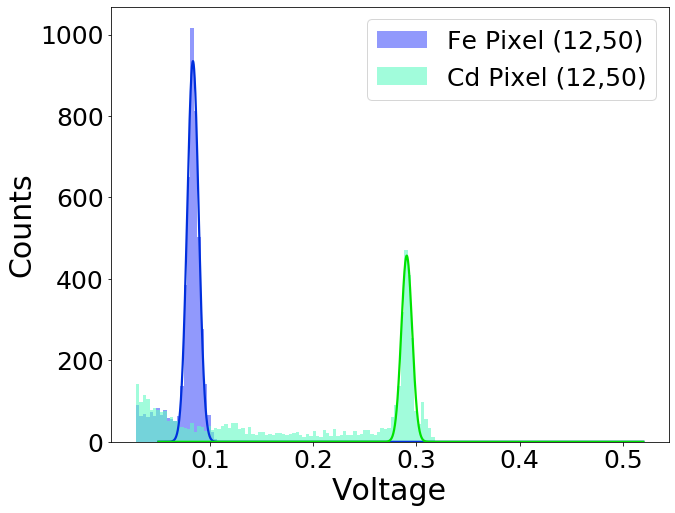

In [16]:
plot_multiple_photopeaks([Fe_12_50_10_2, Cd_12_50_9_23], [[800, 0.1, 0.005], [800, 0.3, 0.005]], ['Fe Pixel (12,50)', 'Cd Pixel (12,50)'])

Beta: [0.015439  0.0299534]
Beta Std Error: [0.00228263 0.04298237]
Beta Covariance: [[ 7.20856722e-07 -1.22771116e-05]
 [-1.22771116e-05  2.55599670e-04]]
Residual Variance: 7.228039589895258
Inverse Condition #: 0.0013503269789429829
Reason(s) for Halting:
  Sum of squares convergence
Chi squared for the linear fit is 349.33998.
Beta: [ 1.21489332e-05 -1.18613633e-03  4.41639440e-02 -1.38261772e-01]
Beta Std Error: [2.05855098e-06 1.20523975e-04 2.12652236e-03 1.12305116e-02]
Beta Covariance: [[ 3.99055996e-10 -2.32708378e-08  4.01722181e-07 -1.96276161e-06]
 [-2.32708378e-08  1.36790986e-06 -2.39038352e-05  1.18999442e-04]
 [ 4.01722181e-07 -2.39038352e-05  4.25843961e-04 -2.18721358e-03]
 [-1.96276161e-06  1.18999442e-04 -2.18721358e-03  1.18770797e-02]]
Residual Variance: 0.010619141650801087
Inverse Condition #: 1.7573895617815436e-07
Reason(s) for Halting:
  Sum of squares convergence
Chi squared for the 3rd deg fit is 0.24002.


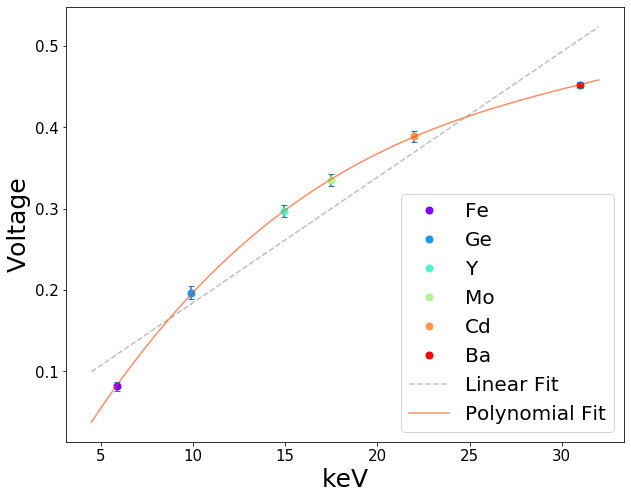

In [41]:
# Performing energy calibration 
# Here I use kind of a weird fit function from scipy
# I chose it because I liked the way it incorporated errors on the data.
# However, maybe I should have used curve_fit again; each to their own.

from scipy.odr import ODR, Model, Data, RealData
import numpy as np
from matplotlib.pyplot import cm

def func(b, x):
    return b[0]*x + b[1]

#Create a Model:
linear = Model(func)

#Define Data
# Inputting the data by hand bwahaha
keV = [5.889, 9.886, 14.958, 17.479, 21.9906, 30.9731]
keV_err = [0.1, 0.1, 0.1, 0.1, 0.1, 0.1]
V = [0.0815, 0.1969, 0.2972, 0.3351, 0.3890, 0.4527]
keV_fit = np.linspace(4.5, 32, 1000)
V_err = [0.0057, 0.0078, 0.0068, 0.0072, 0.0067, 0.0036]

mydata = RealData(keV, V, sy=V_err)

#Instantiate ODR with your data, model and initial parameter estimate.:
myodr_linear = ODR(mydata, linear, beta0=[67.0, -4])

myoutput_lin = myodr_linear.run()
myoutput_lin.pprint()

output_dict_lin = myoutput_lin.__dict__
m_lin, b_lin = output_dict_lin['beta'][0], output_dict_lin['beta'][1]
m_lin_err, b_lin_err = output_dict_lin['sd_beta'][0], output_dict_lin['sd_beta'][1]

plt.figure(figsize = (10, 8))
labels = ['Fe', 'Ge', 'Y', 'Mo', 'Cd', 'Ba']
elem_color = (cm.rainbow(np.linspace(0,1,len(labels))))
ind = 0

for elem in labels:
    plt.plot(keV[ind], V[ind], 'o', markersize=7, color=elem_color[ind], label=elem)
    ind += 1

#plt.errorbar(V, keV, xerr=V_err, fmt='none')
plt.plot(keV_fit, (keV_fit*m_lin + b_lin), 'gray', alpha=0.5, linestyle='--', label='Linear Fit')

fit_vals_lin = [elem*m_lin + b_lin for elem in keV]
x_squared_lin = np.sum(((fit_vals_lin - np.array(V))/np.array(V_err))**2)
print("Chi squared for the linear fit is %0.5f."%x_squared_lin)


###


def poly_mult_func(b, x):
    return b[0]*(x**3) + b[1]*(x**2) + b[2]*x + b[3]

#Create a Model:
binomial_mult = Model(poly_mult_func)

mydata = RealData(keV, V, sy=V_err)

#Instantiate ODR with your data, model and initial parameter estimate.:
myodr_binomial = ODR(mydata, binomial_mult, beta0=[10.0, 0, 0, 0])

myoutput_bi = myodr_binomial.run()
myoutput_bi.pprint()

output_dict_bi = myoutput_bi.__dict__
a_mult_keV, b_mult_keV, c_mult_keV, d_mult_keV = output_dict_bi['beta'][0], output_dict_bi['beta'][1], output_dict_bi['beta'][2], output_dict_bi['beta'][3]
a_mult_err_keV, b_mult_err_keV, c_mult_err_keV, d_mult_keV = output_dict_bi['sd_beta'][0], output_dict_bi['sd_beta'][1], output_dict_bi['sd_beta'][2], output_dict_bi['sd_beta'][3]

#labels = ['Fe (new)', 'Ge', 'Y', 'Mo', 'Cd', 'Ba']
elem_color = (cm.rainbow(np.linspace(0,1,len(labels))))
ind = 0

fit_vals_deg3 = [poly_mult_func(output_dict_bi['beta'], elem) for elem in keV]
x_squared_deg3 = np.sum(((fit_vals_deg3 - np.array(V))/np.array(V_err))**2)
print("Chi squared for the 3rd deg fit is %0.5f."%x_squared_deg3)

plt.errorbar(keV, V, yerr=V_err, capsize=3, fmt='none')
plt.plot(keV_fit, poly_mult_func(output_dict_bi['beta'], keV_fit), color='orangered', alpha=0.6, linestyle='-', label='Polynomial Fit')
axes = plt. gca()
axes.tick_params(axis='both', which='major', labelsize=15)
plt.ylabel('Voltage', fontsize=25)
plt.xlabel('keV', fontsize=25)
plt.legend(fontsize=20)

# The resulting plot is what I used for my paper because it looked better than the spline

V=0.082 -> E=5.8
V=0.197 -> E=10.0
V=0.297 -> E=14.9
V=0.335 -> E=17.4
V=0.389 -> E=22.0
V=0.453 -> E=31.0


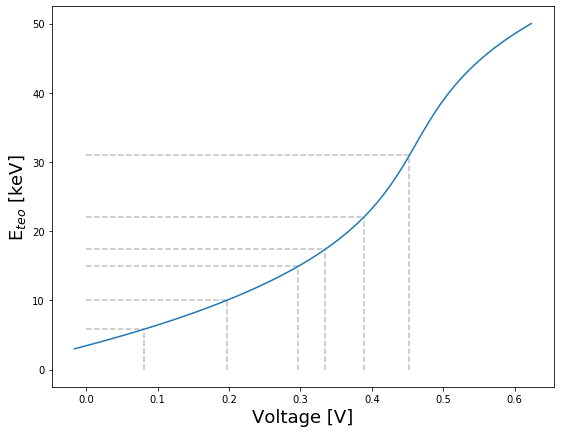

In [30]:
# Ok, talking to Michela this is the CORRECT way to incorporate errors while calibrating the energy.
# Spline time!

from scipy.interpolate import interp1d

keV_new = np.linspace(3, 50, 100)
V_new = np.zeros(100)
for i in range(len(V_new)): 
     V_new[i] = poly_mult_func(output_dict_bi['beta'], keV_new[i])

inverse_spline = interp1d(V_new, keV_new)

E_values = inverse_spline(V)


plt.figure(figsize=(9, 7))
plt.plot(V_new, keV_new)
plt.ylabel('E$_{teo}$ [keV]', size=18)
plt.xlabel('Voltage [V]', size=18)

for i, e in enumerate(E_values):
    print('V=%.3f -> E=%.1f'%(V[i], e))
    plt.vlines(V[i], 0, inverse_spline(V[i]), linestyle='--', color='silver')
    plt.hlines(e, 0, V[i], linestyle='--', color='silver')

Text(0, 0.5, '# of events')

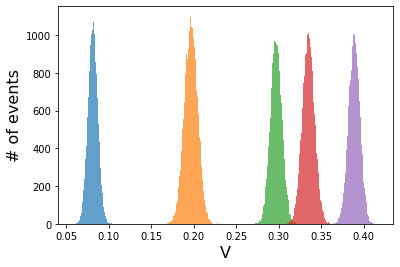

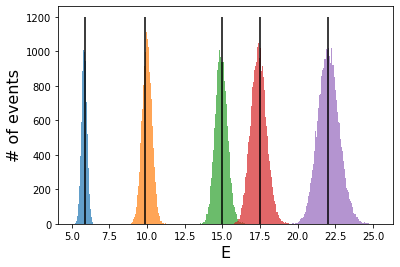

In [31]:
Edistr_ = []
plt.figure()
for i, v in enumerate(V[:-1]):   
    mu, sigma = v, V_err[i]
    Vgauss = np.random.normal(mu, sigma, 30000)
    Edistr_.append(inverse_spline(Vgauss))

    plt.hist(Vgauss, 100, histtype='stepfilled', alpha=0.7)
plt.xlabel('V', size=16)
plt.ylabel('# of events', size=16)

plt.figure()
for i, v in enumerate(V[:-1]): 
    plt.vlines(keV[i], 0, 1200, color='k')  
    plt.hist(Edistr_[i], 100, alpha=0.7)
plt.xlabel('E', size=16)
plt.ylabel('# of events', size=16)

In [42]:
# This is the function to plot multiple photopeaks on one plot w the energy calibration from the spline applied

import scipy
from scipy.optimize import curve_fit
import pylab 
from matplotlib.pyplot import cm

def plot_all_spline(peaks_names, guesses, labels):
   
    plt.figure(figsize = (10, 8))
    color=(cm.rainbow(np.linspace(0,1,len(peaks_names)*4)))
    color_fit=(cm.nipy_spectral(np.linspace(0,1,len(peaks_names)*4)))
    for i in range(len(peaks_names)):
        bins = np.linspace(1,35,180)
        fit_hist, bins_1 = np.histogram(inverse_spline(peaks_names[i]), bins=bins)
        bins_2 = np.array([bins[i] for i in range(len(bins)-1)])

        x = bins_2
        y = fit_hist
        xspace = np.linspace(4, 35, 10000) # This creates a smoother plot when plotting the fit

        # Guesses for p01: [Amplitude, Mu, Sigma]. These guesses must be reasonable.
        p01 = guesses[i]

        # Define the fit function (a Gaussian)
        def Gauss(x, A, mu, sigma):
            return A*np.exp(-(x-mu)**2/(2.0*sigma**2))

        popt, pcov = curve_fit(Gauss, xdata=bins_2, ydata=fit_hist, p0=p01)
        
        # Print the outputs 
        (Amp, Mu, Sigma) = popt
        print("For %s, amplitude = %d, Mu = %0.4f, Sigma = %0.4f" %(labels[i], Amp, Mu, Sigma))
        energy_res = (2.355*Sigma*100)/Mu # Calculates energy resolution
        (Amp_err, Mu_err, Sigma_err) = np.sqrt(np.diag(pcov))
        # Error propagation
        partial_sigma = (2.355*100)/Mu
        partial_mu = (2.355*100*Sigma)/(Mu**2)
        stdev_er = np.sqrt(((partial_sigma**2)*(Sigma_err**2))+((partial_mu**2)*(Mu_err)**2))
        print("Error in amplitude is %0.3f. \nError in mu is %0.6f. \nError in sigma is %0.6f." %(Amp_err, Mu_err, Sigma_err))
        print("The energy resolution for %s is approximately %0.3f +/- %0.5f %%." %(labels[i], energy_res, stdev_er))
        h = color[4*i]
        j = color_fit[4*i + 2]
            
        # Plot the horizontal theory lines and label them  
        theory_mu = [5.889, 9.886, 14.958, 17.479, 21.9906, 30.9731]
        plt.axvline(x=theory_mu[i], ymin=0, ymax=(np.max(fit_hist)), linestyle='--', color=h)
        
        for p in range(len(theory_mu)):
            m = color[4*p]
            plt.annotate(labels[p], (theory_mu[p], 400), textcoords="offset points", xytext=(10,130), ha='left', fontsize=20, color=m)
            
        #Plot everything else
        if labels[i]=='Cd':
            # Plot the data
            plt.bar(bins_2[15:len(bins_2)], fit_hist[15:len(bins_2)], width=bins[1] - bins[0], color=h, alpha=0.4, label=(labels[i]))
            # Plot the fit
            plt.plot(xspace, Gauss(xspace, *popt), '-', color=j)
        else:
            # Plot the data
            plt.bar(bins_2, fit_hist, width=bins[1] - bins[0], color=h, alpha=0.4, label=(labels[i]))
            # Plot the fit
            plt.plot(xspace, Gauss(xspace, *popt), '-', color=j)

    plt.xlim(3,36)
    axes = plt. gca()
    axes.tick_params(axis='both', which='major', labelsize=15)
    #plt.legend(fontsize='xx-large')
    plt.xlabel('Energy (keV)', fontsize=25)
    plt.ylabel('Counts', fontsize=25)
    #plt.xticks(fontsize=14)
    #plt.yticks(fontsize=14)
    #plt.savefig('e_res_poly_shift.png')
    plt.show()
    
    return

<BarContainer object of 179 artists>

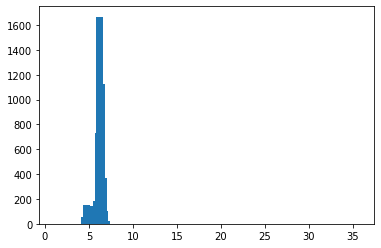

In [46]:
bins = np.linspace(1,35,180)
fit_hist, bins_1 = np.histogram(inverse_spline(Fe_0_50), bins=bins)
bins_2 = np.array([bins[i] for i in range(len(bins)-1)])

plt.bar(bins_2+0.5, fit_hist)

For Fe, amplitude = 1642, Mu = 5.7862, Sigma = 0.1889
Error in amplitude is 23.484. 
Error in mu is 0.003124. 
Error in sigma is 0.003114.
The energy resolution for Fe is approximately 7.688 +/- 0.12682 %.
For Ge, amplitude = 791, Mu = 9.9728, Sigma = 0.3279
Error in amplitude is 17.920. 
Error in mu is 0.008576. 
Error in sigma is 0.008576.
The energy resolution for Ge is approximately 7.744 +/- 0.20262 %.
For Y, amplitude = 452, Mu = 14.9373, Sigma = 0.4047
Error in amplitude is 19.482. 
Error in mu is 0.020135. 
Error in sigma is 0.020135.
The energy resolution for Y is approximately 6.380 +/- 0.31755 %.
For Mo, amplitude = 328, Mu = 17.4228, Sigma = 0.5168
Error in amplitude is 16.306. 
Error in mu is 0.029607. 
Error in sigma is 0.029607.
The energy resolution for Mo is approximately 6.985 +/- 0.40036 %.
For Cd, amplitude = 170, Mu = 22.1259, Sigma = 0.6988
Error in amplitude is 21.786. 
Error in mu is 0.102952. 
Error in sigma is 0.102952.
The energy resolution for Cd is approxim

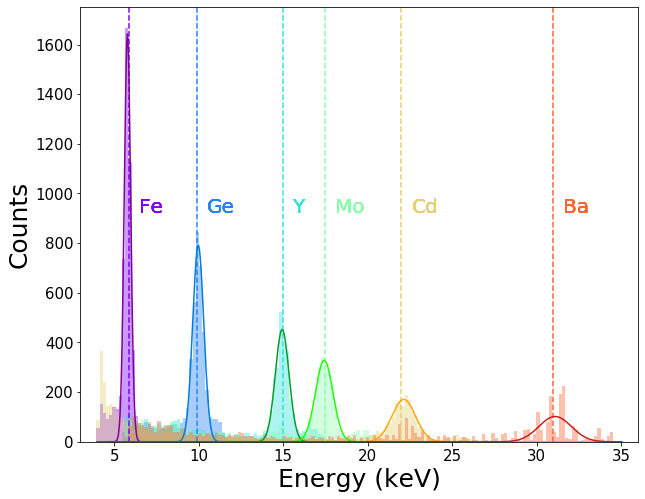

In [43]:
plot_all_spline([Fe_0_50, Ge, Y, Mo, Cd_0_50, Ba], [[175, 5.8, 0.5], [175, 10, 0.5], [175, 15, 0.5], [175, 18, 0.5], [175, 23, 0.5], [150, 31.1, 0.5]], ['Fe','Ge','Y','Mo','Cd','Ba'])

Beta: [0.09572853 3.20195436 0.5        0.5       ]
Beta Std Error: [0.00671942 0.09708612 0.         0.        ]
Beta Covariance: [[ 0.0458177  -0.63206664  0.          0.        ]
 [-0.63206664  9.56498226  0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
Residual Variance: 0.0009854399460491753
Inverse Condition #: 0.019666666381806377
Reason(s) for Halting:
  Problem is not full rank at solution
  Sum of squares convergence


Text(0.5, 0, 'keV')

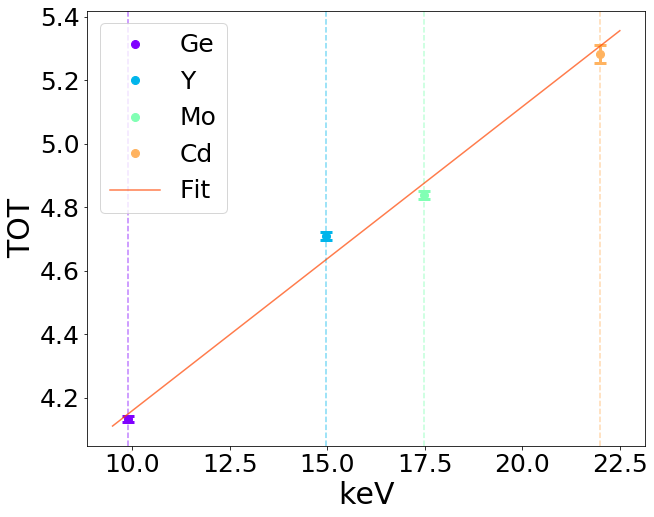

In [17]:
# Energy calibration for the TOT data and plotting

from scipy.odr import ODR, Model, Data, RealData
import numpy as np
from matplotlib.pyplot import cm

#Define Data
keV = [9.886, 14.958, 17.479, 21.9906]
#30.9731
keV_err = [0.1, 0.1, 0.1, 0.1]
TOT = [4.1332, 4.7086, 4.8374, 5.2827]
keV_fit = np.linspace(9.5, 22.5, 1000)
#TOT_err = [0.009061, 0.010852, 0.010947, 0.025095]
TOT_err = [1.3152, 1.9454, 2.2643, 2.5852]
TOT_err_stat = [0.009884, 0.012152, 0.012312, 0.028182]

#V_err_test = [elem*0.1 for elem in V_err]

plt.figure(figsize = (10, 8))
labels = ['Ge', 'Y', 'Mo', 'Cd']
elem_color = (cm.rainbow(np.linspace(0,1,len(labels)+1)))
ind = 0

theory_mu = keV
    
for elem in labels:
    plt.plot(keV[ind], TOT[ind], 'o', markersize=8, color=elem_color[ind], label=elem)
    plt.errorbar(keV[ind], TOT[ind], yerr=TOT_err_stat[ind], capsize=6, capthick=3, linewidth=3, color=elem_color[ind], fmt='none')
    plt.axvline(x=theory_mu[ind], ymin=0, ymax=(np.max(TOT)), linestyle='--', color=elem_color[ind], alpha=0.5)
    ind += 1

###


def lin_func(b, x):
    return b[0]*(x) + b[1]

#Create a Model:
linear = Model(lin_func)

#V_err_test = [elem*0.1 for elem in V_err]

mydata = RealData(keV, TOT, sy=TOT_err)

#Instantiate ODR with your data, model and initial parameter estimate.:
myodr_linear = ODR(mydata, linear, beta0=[0.5, 0.5, 0.5, 0.5])

myoutput_lin = myodr_linear.run()
myoutput_lin.pprint()

output_dict_lin = myoutput_lin.__dict__
a_keV_lin, b_keV_lin = output_dict_lin['beta'][0], output_dict_lin['beta'][1]
a_keV_lin_err, b_keV_lin_err = output_dict_lin['sd_beta'][0], output_dict_lin['sd_beta'][1]

#labels = ['Fe (new)', 'Ge', 'Y', 'Mo', 'Cd', 'Ba']
elem_color = (cm.rainbow(np.linspace(0,1,len(labels))))
ind = 0

axes = plt. gca()
axes.tick_params(axis='both', which='major', labelsize=25)
plt.plot(keV_fit, lin_func(output_dict_lin['beta'], keV_fit), color='orangered', alpha=0.7, linestyle='-', label='Fit')
plt.legend(fontsize=25, loc='upper left')
plt.ylabel('TOT', fontsize=30)
plt.xlabel('keV', fontsize=30)

Beta: [64.77094409 -1.94009105]
Beta Std Error: [9.57625761 3.04590711]
Beta Covariance: [[12.68735576 -3.71611922]
 [-3.71611922  1.28354998]]
Residual Variance: 7.228039589861429
Inverse Condition #: 0.06603047787016457
Reason(s) for Halting:
  Sum of squares convergence
Beta: [ 1.45493141e+04 -1.82268321e+04  8.93977058e+03 -2.02303286e+03
  2.41992735e+02 -4.48356054e+00]
Beta Std Error: [2.35836596e-08 3.35174177e-08 1.80399204e-08 4.52403855e-09
 5.15010798e-10 2.03021413e-11]
Beta Covariance: [[ 3.09274607e+10 -4.39442024e+10  2.36348762e+10 -5.92021949e+09
   6.72959870e+08 -2.64911723e+07]
 [-4.39442024e+10  6.24687724e+10 -3.36140783e+10  8.42371422e+09
  -9.57916969e+08  3.77190456e+07]
 [ 2.36348762e+10 -3.36140783e+10  1.80963547e+10 -4.53711567e+09
   5.16164719e+08 -2.03307323e+07]
 [-5.92021949e+09  8.42371422e+09 -4.53711567e+09  1.13808438e+09
  -1.29530696e+08  5.10362548e+06]
 [ 6.72959870e+08 -9.57916969e+08  5.16164719e+08 -1.29530696e+08
   1.47487270e+07 -5.8131

Text(0.5, 0, 'keV')

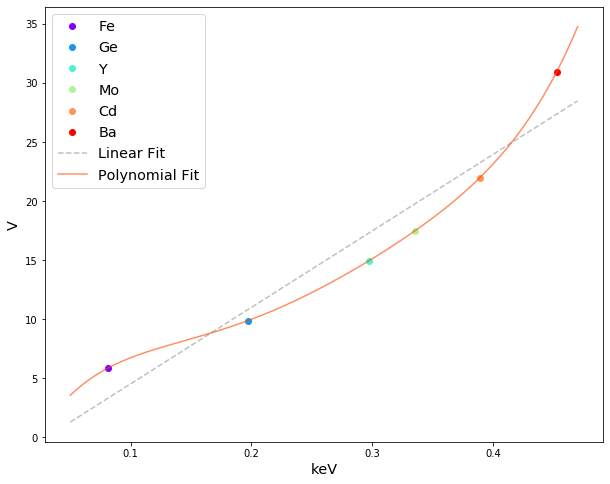

In [49]:
# This is old code when performing the energy calibration with a higher order polynomial

from scipy.odr import ODR, Model, Data, RealData
import numpy as np
from matplotlib.pyplot import cm

def func(b, x):
    return b[0]*x + b[1]

#Create a Model:
linear = Model(func)

#Define Data
keV = [5.889, 9.886, 14.958, 17.479, 21.9906, 30.9731]
#30.9731
keV_err = [0.1, 0.1, 0.1, 0.1, 0.1, 0.1]
V = [0.0815, 0.1969, 0.2972, 0.3351, 0.3890, 0.4527]
#0.4527
V_fit = np.linspace(0.05, 0.47, 1000)
V_err = [0.0057, 0.0078, 0.0068, 0.0072, 0.0067, 0.0036]
#0.0036

V_err_test = [elem*0.1 for elem in V_err]

mydata = RealData(V, keV, sx=V_err)

#Instantiate ODR with your data, model and initial parameter estimate.:
myodr_linear = ODR(mydata, linear, beta0=[67.0, -4])

myoutput_lin = myodr_linear.run()
myoutput_lin.pprint()

output_dict_lin = myoutput_lin.__dict__
m_lin, b_lin = output_dict_lin['beta'][0], output_dict_lin['beta'][1]
m_lin_err, b_lin_err = output_dict_lin['sd_beta'][0], output_dict_lin['sd_beta'][1]

plt.figure(figsize = (10, 8))
labels = ['Fe', 'Ge', 'Y', 'Mo', 'Cd', 'Ba']
elem_color = (cm.rainbow(np.linspace(0,1,len(labels))))
ind = 0

for elem in labels:
    plt.plot(V[ind], keV[ind], 'o', color=elem_color[ind], label=elem)
    ind += 1

#plt.errorbar(V, keV, xerr=V_err, fmt='none')
plt.plot(V_fit, (V_fit*m_lin + b_lin), 'gray', alpha=0.5, linestyle='--', label='Linear Fit')


###


def poly_mult_func(b, x):
    return b[0]*(x**5) + b[1]*(x**4) + b[2]*(x**3) + b[3]*(x**2) + b[4]*(x) + b[5]

#Create a Model:
binomial_mult = Model(poly_mult_func)

V_err_test = [elem*0.1 for elem in V_err]

mydata = RealData(V, keV, sx=V_err)

#Instantiate ODR with your data, model and initial parameter estimate.:
myodr_binomial = ODR(mydata, binomial_mult, beta0=[10.0, 10.0, 5, 0, 0, 0])

myoutput_bi = myodr_binomial.run()
myoutput_bi.pprint()

output_dict_bi = myoutput_bi.__dict__
a_mult, b_mult, c_mult, d_mult, e_mult, f_mult = output_dict_bi['beta'][0], output_dict_bi['beta'][1], output_dict_bi['beta'][2], output_dict_bi['beta'][3], output_dict_bi['beta'][4], output_dict_bi['beta'][5]
a_mult_err, b_mult_err, c_mult_err, d_mult_err, e_mult_err, f_mult_err = output_dict_bi['sd_beta'][0], output_dict_bi['sd_beta'][1], output_dict_bi['sd_beta'][2], output_dict_bi['sd_beta'][3], output_dict_bi['sd_beta'][4], output_dict_bi['sd_beta'][5]

#labels = ['Fe (new)', 'Ge', 'Y', 'Mo', 'Cd', 'Ba']
elem_color = (cm.rainbow(np.linspace(0,1,len(labels))))
ind = 0

#plt.errorbar(keV, V, yerr=V_err, fmt='none')
plt.plot(V_fit, (V_fit**5)*a_mult + (V_fit**4)*b_mult + (V_fit**3)*c_mult + (V_fit**2)*d_mult + (V_fit)*e_mult + f_mult, color='orangered', alpha=0.6, linestyle='-', label='Polynomial Fit')
plt.legend(fontsize='x-large')
plt.ylabel('V', fontsize='x-large')
plt.xlabel('keV', fontsize='x-large')

For Fe (new), amplitude = 558, Mu = 3.8552, Sigma = 0.5021
Error in amplitude is 7.079. 
Error in mu is 0.007352. 
Error in sigma is 0.007352.
The energy resolution for Fe (new) is approximately 30.671 +/- 0.45291 %.
For Ge, amplitude = 429, Mu = 9.8779, Sigma = 0.5522
Error in amplitude is 8.911. 
Error in mu is 0.013224. 
Error in sigma is 0.013224.
The energy resolution for Ge is approximately 13.165 +/- 0.31576 %.
For Y, amplitude = 350, Mu = 16.9869, Sigma = 0.4767
Error in amplitude is 12.018. 
Error in mu is 0.018893. 
Error in sigma is 0.018893.
The energy resolution for Y is approximately 6.608 +/- 0.26203 %.
For Mo, amplitude = 307, Mu = 19.6619, Sigma = 0.5038
Error in amplitude is 11.717. 
Error in mu is 0.022164. 
Error in sigma is 0.022164.
The energy resolution for Mo is approximately 6.035 +/- 0.26555 %.
For Cd, amplitude = 237, Mu = 23.4793, Sigma = 0.4521
Error in amplitude is 8.492. 
Error in mu is 0.018683. 
Error in sigma is 0.018683.
The energy resolution for Cd i

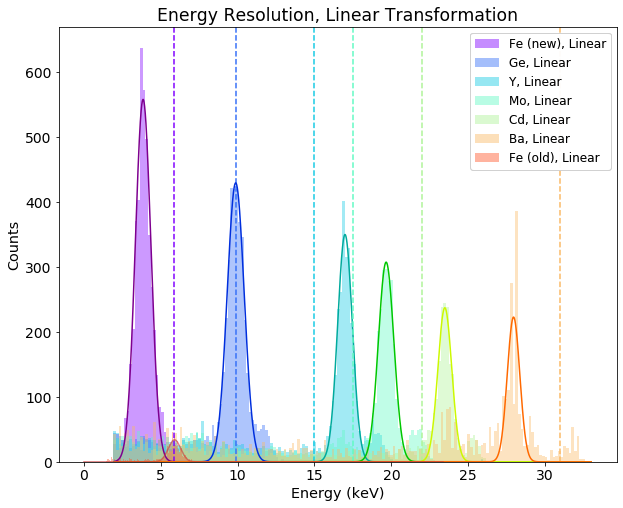

In [105]:
# This plot_all function is from old code... But I thought it would be nice to keep the linear calibration plot (to
# look at how terrible it is)

plot_all([Fe, Ge, Y, Mo, Cd, Ba, MCA_peaks_fe], [[600, 3.9, 0.29], [400, 9.9, 0.4], [390, 16.1, 0.25], [280, 19, 0.2], [300, 23, 0.2], [250, 25.6, 0.1], [35, 5.89, 0.05]],['Fe (new)','Ge','Y','Mo','Cd','Ba','Fe (old)'])

k is 25.0467.


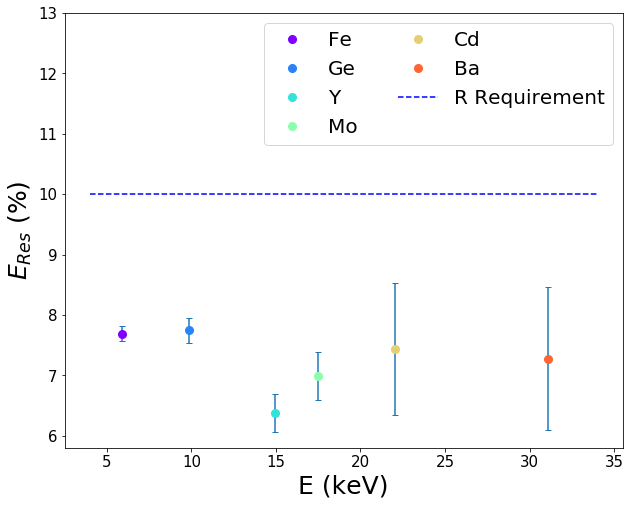

In [46]:
# Plotting fitted energy values v resolution from one pixel

from scipy.odr import ODR, Model, Data, RealData
import numpy as np
from matplotlib.pyplot import cm
import scipy
from scipy.optimize import curve_fit
import pylab 

from matplotlib.ticker import AutoLocator, ScalarFormatter

fig, ax = plt.subplots(figsize = (10, 8))
E = [5.8879, 9.8482, 14.9736, 17.497, 22.0454, 31.0835]
R = [7.688, 7.744, 6.380, 6.985, 7.438, 7.273]

E_fit = np.linspace(0.1,5.0,1000)

ln_R = np.log(R)
ln_E = np.log(E)
ln_E_fit = np.log(E_fit)

p0_res_poly = [30]

# I thought I was going to do something fancy with the Knoll equation, ln(R) = ln(K) - 1/2*ln(E)
def res_poly(x,k):
    return (k*np.sqrt(x))/(x)
    
popt_res_poly, pcov_res_poly = curve_fit(res_poly, xdata=E, ydata=R, p0=p0_res_poly)
k = popt_res_poly
k_err = np.sqrt(np.diag(pcov_res_poly))
print("k is %0.4f."%k)

labels = ['Fe', 'Ge', 'Y', 'Mo',  'Cd', 'Ba']

colors=(cm.rainbow(np.linspace(0,1,len(labels)*4)))

# In the end I just plotted E v R to show that everything was meeting the baseline requirement
# of 10% resolution at 60 keV (blue line)

for t in range(len(E)):
    plt.plot((E[t]), R[t], 'o', markersize=8, color = colors[4*t], label=labels[t])

R_err = [0.12682, 0.20262, 0.31755, 0.40036, 1.09633, 1.18270]
plt.errorbar((E), R, yerr=R_err, capsize=3, fmt='none')

axes = plt.gca()
axes.tick_params(axis='both', which='major', labelsize=15)
plt.hlines(10, 4, 34, linestyles='dashed', color='blue', label='R Requirement')
plt.ylim(5.8, 13)
plt.legend(fontsize=20, ncol=2)
plt.xlabel('E (keV)', fontsize=25)
plt.ylabel('$E_{Res}$ (%)', fontsize=25)
#plt.savefig("e_vs_res_lin.png")
plt.show()

In [52]:
# The fitted sigmas I used for simulations (I plugged the sigmas in to provide the
# energy resolution in MEGAlib). The fitted sigs go into the geometry file, I believe.

In [53]:
# THIS IS SUPER OLD and NOT TO BE TRUSTED (the input data, not the general idea)
# LINEAR SHIFT
# Fitted sigmas

# Need to perform a linear energy calibration to find the shift here. I accidentally deleted the lin shift
# because I wasn't using it, whoops

elements = ['Fe (new)', 'Ge', 'Y', 'Mo', 'Cd', 'Ba']
element_e = [5.889, 9.886, 14.958, 17.479, 21.9906, 30.1]
element_mu_lin = [3.8552, 9.8779, 16.9869, 19.6619, 23.4793, 27.9486]
#res_old_lin = [30.671, 13.165, 6.608, 6.035, 4.535, 3.434]
res_new_lin = np.zeros(len(elements))
sigma_new_lin = np.zeros(len(elements))

for i in range(len(elements)):
    res_new_lin[i] = np.e**((m_res_lin*np.log(element_mu_lin[i])) + b_res_lin)
    sigma_new_lin[i] = (res_new_lin[i]*element_mu_lin[i])/(2.355*100)
    print("The fitted sigma res for %s is %f." %(elements[i], sigma_new_lin[i]))

NameError: name 'm_res_lin' is not defined

In [60]:
# THIS IS OLD and doesn't use the spline; should be redone before incorporated into sims
# POLYNOMIAL SHIFT
# Fitted sigmas

elements = ['Fe', 'Ge', 'Y', 'Mo', 'Cd', 'Ba']
element_e = [5.889, 9.886, 14.958, 17.479, 21.9906, 30.1]
element_mu_poly = [5.8879, 9.8482, 14.9736, 17.497, 22.0454, 31.0835]
res_new_poly = np.zeros(len(elements))
sigma_new_poly = np.zeros(len(elements))

for i in range(len(elements)):
    res_new_poly[i] = np.e**((m_res_poly*np.log(element_mu_poly[i])) + b_res_poly)
    sigma_new_poly[i] = (res_new_poly[i]*element_mu_poly[i])/(2.355)
    print("The fitted sigma res for %s is %f." %(elements[i], sigma_new_poly[i]))

The fitted sigma res for Fe is 0.243708.
The fitted sigma res for Ge is 0.364229.
The fitted sigma res for Y is 0.505264.
The fitted sigma res for Mo is 0.570628.
The fitted sigma res for Cd is 0.683509.
The fitted sigma res for Ba is 0.893923.
